# Introduction

As a recent entrant into the coffee industry, my curiosity about the global dynamics of coffee trade has deepened. This project seeks to trace the flow of coffee across the globe over the past fifty years, highlighting not just the volume of exports but also the socio-economic and cultural shifts that have influenced these patterns. Coffee, as a commodity, has played a pivotal role in shaping economies and cultures, making it a compelling subject of study. By examining the emergence of coffee re-exporting industries in countries where coffee culture has burgeoned, this project aims to uncover underlying trends and insights.

This exploration is particularly relevant to my coursework as it requires navigating access to gated data through various means such as direct inquiries to organizations, web scraping, and reviewing government documents. The challenge of piecing together fragmented data from diverse sources not only enhances my data acquisition skills but also enriches my understanding of global trade networks.

# Data Collection & Curation
The primary goal of this project is to analyze the global coffee trade. The initial focus was on identifying the major coffee exporting countries. I utilized a dataset from the Harvard Business Review detailing coffee exports, which included data on key exporters like Brazil, Colombia, and Vietnam. The choice of these countries is based on their significant increase in coffee production post-1990.

Data visualization has been an integral part of this analysis, enabling easier interpretation and presentation of complex data. For instance, a world map visualization of coffee exports over the years reveals not only the leading exporters but also how these positions have evolved over time. Additionally, the project explores the growth rates of exports versus actual production, providing insights into the operational scale and international reach of these exporting nations.

Data sources include the International Coffee Organization and historical pricing data, which helps correlate wage fluctuations in producer countries with retail coffee price trends in consumer markets like the USA. This comprehensive approach not only tracks the volume of trade but also contextualizes it within the broader economic landscape.

# Data Analysis
This project has unearthed several intriguing trends. Notably, countries that were once at the forefront of coffee exports have seen a decline since the 1990s. This shift highlights the dynamic nature of global trade and the potential impact of both market and non-market forces. The analysis also extends to examining the role of non-producing countries like Japan and the USA in the re-exporting market, which underscores the complex interdependencies within the coffee industry.

The methodological framework employed here includes advanced data visualization tools and techniques to map out and interpret the extensive data on coffee exports. By comparing historical data on wage rates and coffee prices, this analysis also makes evident the discrepancies between the cost of production and retail pricing, providing a nuanced understanding of market dynamics.

**Data Analysis 1**

I have created a world map with HBR's coffee exports data to see which region around the world has most exports and therefore I need to focus on more

In [1]:
import pandas as pd
import plotly.express as px
import pycountry

def get_iso_code(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except:
        return None

# Load the dataset
data = pd.read_csv('hbs_coffee-coffee.csv')

# Convert data types
data['year'] = data['year'].astype(str)
data['data'] = pd.to_numeric(data['data'], errors='coerce')

# Map country names to ISO codes
data['iso_alpha'] = data['COUNTRY'].apply(get_iso_code)

# Remove rows where iso_alpha is None (meaning no valid ISO code was found)
data = data[data['iso_alpha'].notna()]

# Ensure the data is sorted by year to display correctly in the slider
data = data.sort_values('year')

# Creating the interactive map
fig = px.choropleth(data_frame=data,
                    locations='iso_alpha',
                    color='data',
                    hover_name='COUNTRY',
                    animation_frame='year',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    projection='natural earth',
                    title='Global Coffee Exports Over Time')

# Show the figure
fig.show()

**Analysis Conclusion**

with the slider and color based map for coffee export data, we can determine that brazil, columbia, and vietnam are the three most countries that export most coffee in that order. However, I will focus on brazil's coffee exports and data due to it being in the first place with such a large margin

**Data Analysis 2**
I will now add the data I collected from various sources such as international coffee organization(coffee data) or oecd library(minimum wage data) and compare both so I could understand the trend. According to article from international communicaffe, a fair-trade waged farm pays their workers 1307 brl on avg. However, I am unfortunately unable to find past data of such wages in the past and will have to go from minimum wage metrics which is similar to current pay in attempt to predict the past wages.


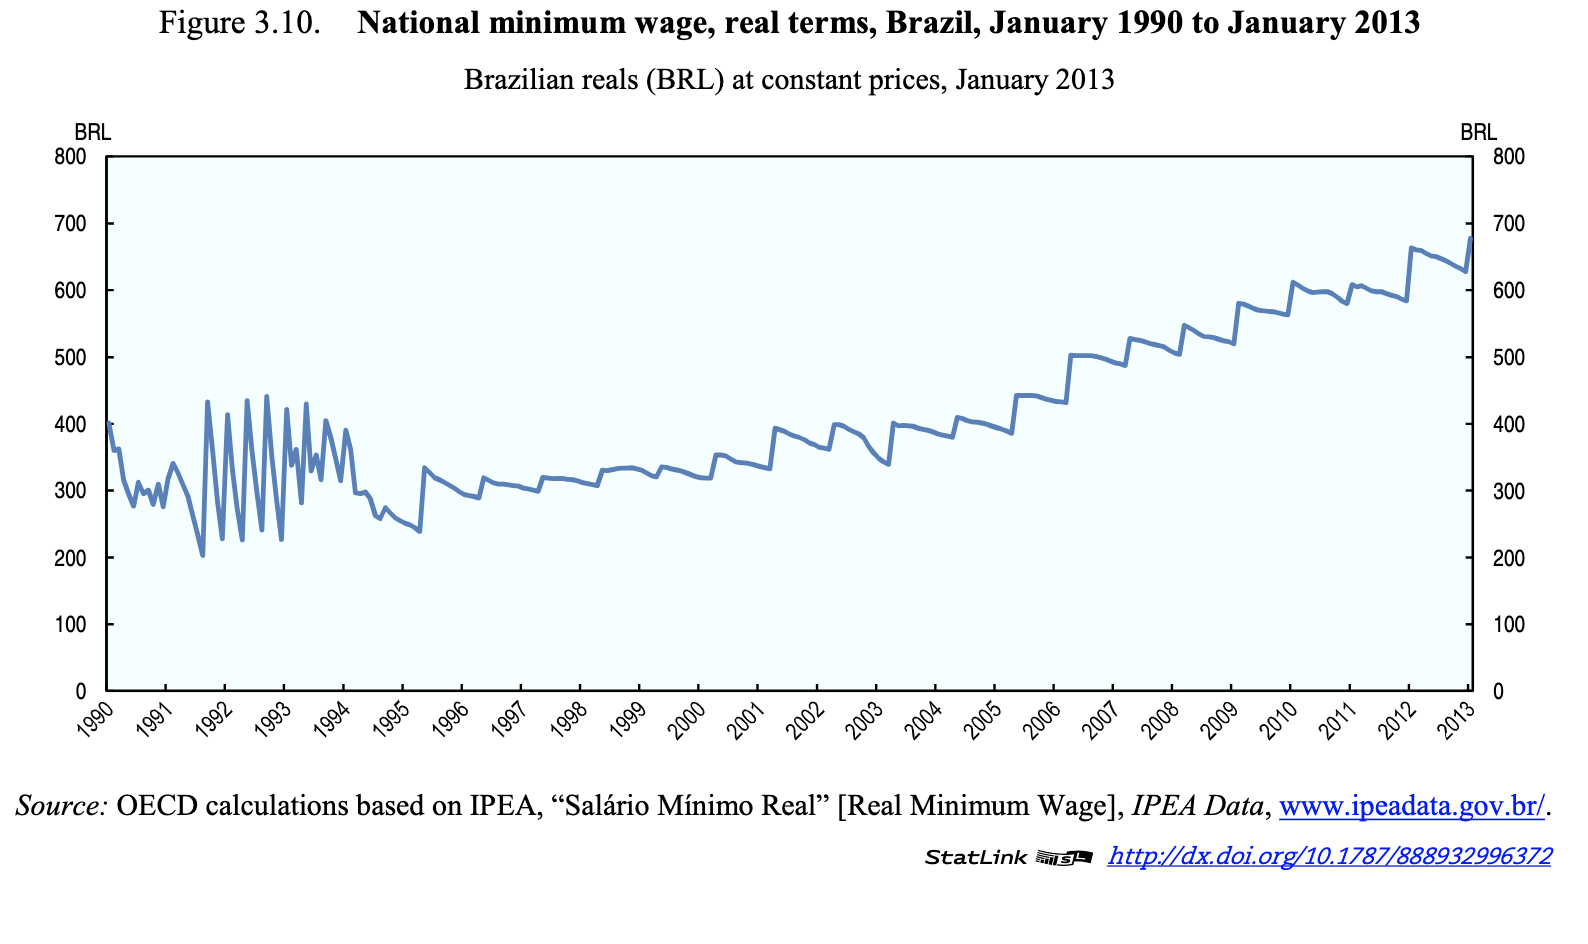

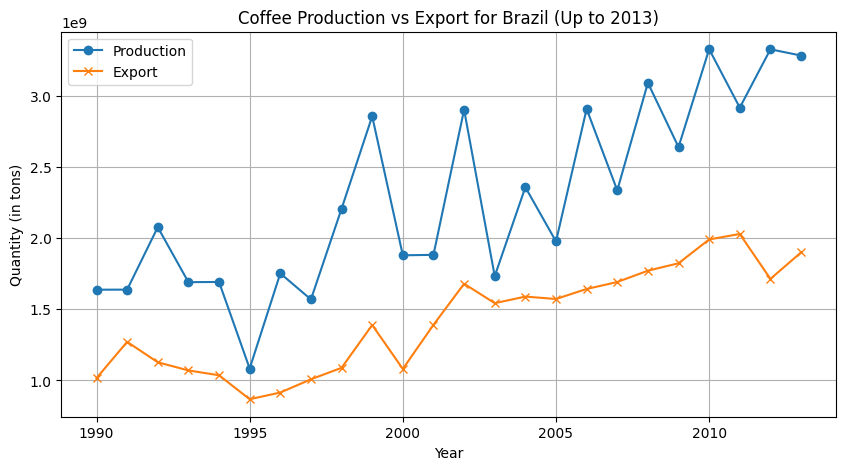

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the coffee production and export data from the provided CSV files
coffee_production = pd.read_csv('ico-data/Coffee_production.csv')
coffee_export = pd.read_csv('ico-data/Coffee_export.csv')

# Selecting data for Brazil - assuming Brazil is present in the data
brazil_production = coffee_production[coffee_production['Country'] == 'Brazil'].iloc[:, 2:-1].T
brazil_production.columns = ['Production']
brazil_production['Year'] = brazil_production.index.str[:4]  # Assuming the years are formatted as 'YYYY/YY'

brazil_export = coffee_export[coffee_export['Country'] == 'Brazil'].iloc[:, 1:-1].T
brazil_export.columns = ['Export']
brazil_export['Year'] = brazil_export.index  # Assuming the years are formatted as 'YYYY'

# Convert 'Year' from string to integer for both datasets
brazil_production['Year'] = brazil_production['Year'].astype(int)
brazil_export['Year'] = brazil_export['Year'].astype(int)

# Filter data to include only up to the year 2013
brazil_production = brazil_production[brazil_production['Year'] <= 2013]
brazil_export = brazil_export[brazil_export['Year'] <= 2013]

# Merge production and export data on 'Year'
brazil_data = pd.merge(brazil_production, brazil_export, on='Year', how='inner')

# Plotting production vs export for Brazil
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(brazil_data['Year'], brazil_data['Production'], label='Production', marker='o')
ax.plot(brazil_data['Year'], brazil_data['Export'], label='Export', marker='x')

ax.set_xlabel("Year")
ax.set_ylabel("Quantity (in tons)")
ax.set_title("Coffee Production vs Export for Brazil (Up to 2013)")
ax.legend()

plt.grid(True)
plt.show()




**Analysis Conclusion 2**

From the dataset provided by the International Coffee Association, one notable trend is the shift in the hierarchy of major coffee exporters since the 1990s. Historical leaders in coffee exports have seen a decline, possibly due to various factors such as economic policies, changes in global demand, or environmental issues impacting coffee yields. This shift underscores the importance of monitoring evolving trade patterns to anticipate changes in the global market landscape.

To deepen this analysis, I incorporated wage data, such as the real minimum wage trends from Brazil shown in the uploaded image. Comparing these wage trends with the coffee export data helps illustrate the economic backdrop against which these trade changes are occurring. For instance, the steady increase in Brazil's real minimum wage from 1994 onwards coincides with periods of intensification and fluctuation in coffee export volumes. This suggests a correlation where improved economic conditions within the country might influence production costs and export competitiveness.

Further, comparing these wage trends with the retail price of coffee in the USA provides insights into the pricing dynamics across the supply chain. Higher wages could lead to increased production costs, which might be passed along to consumers in the form of higher retail prices. This aspect of the analysis is crucial for understanding how wage changes in producing countries can impact global coffee prices, affecting everything from export strategies to consumer behavior in importing nations. 

By integrating these different data layers—production, export, and wage trends—we gain a richer perspective on the global coffee economy, providing stakeholders with valuable information to guide decision-making in this vibrant industry.

Overall, it is obvious that the trend of wage follows production rate, yet there are still some gaps making it seem not very fair for workers.

**Data Analysis 3**
Finally, I will start analyzing the export and import data with the re-export of coffee to track the trend of re-export since it has been the new rising industry of coffee for countries that doesnt produce a lot or any coffee but have a great technologies or skills to roast the beans.

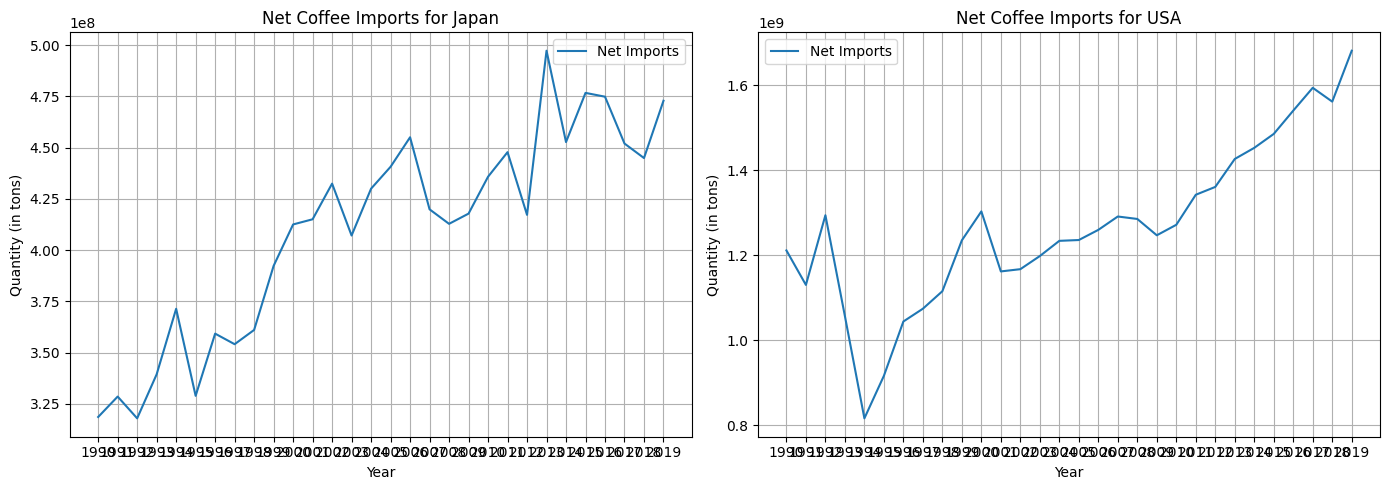

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
coffee_export = pd.read_csv('ico-data/Coffee_export.csv')
coffee_import = pd.read_csv('ico-data/Coffee_import.csv')
coffee_re_export = pd.read_csv('ico-data/Coffee_re_export.csv')

# Filter data for Japan and the USA
japan_import = coffee_import[coffee_import['Country'] == 'Japan']
usa_import = coffee_import[coffee_import['Country'] == 'United States of America']

japan_re_export = coffee_re_export[coffee_re_export['Country'] == 'Japan']
usa_re_export = coffee_re_export[coffee_re_export['Country'] == 'United States of America']

# Calculate net imports (imports - re-exports) for Japan and the USA
japan_net_import = japan_import.iloc[:, 1:-1].sub(japan_re_export.iloc[:, 1:-1].values)
usa_net_import = usa_import.iloc[:, 1:-1].sub(usa_re_export.iloc[:, 1:-1].values)

# Plotting for visual representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Japan's data
ax1.plot(japan_net_import.columns, japan_net_import.values.flatten(), label='Net Imports')
ax1.set_title('Net Coffee Imports for Japan')
ax1.set_xlabel('Year')
ax1.set_ylabel('Quantity (in tons)')
ax1.legend()
ax1.grid(True)

# USA's data
ax2.plot(usa_net_import.columns, usa_net_import.values.flatten(), label='Net Imports')
ax2.set_title('Net Coffee Imports for USA')
ax2.set_xlabel('Year')
ax2.set_ylabel('Quantity (in tons)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


### Japan's Net Coffee Imports Analysis

The net coffee imports for Japan show significant fluctuations, indicating a dynamic interplay between various factors such as changes in domestic demand, import regulations, and perhaps global coffee prices. The graph displays a general upward trend beginning in the mid-2000s, with noticeable peaks and troughs. These peaks may represent periods of increased buying due to anticipated demand surges or favorable market prices, while the subsequent declines could suggest adjustments as the market stabilizes and inventories are balanced. This variability in import volumes could also reflect Japan's sensitivity to external market conditions or shifts in consumer preferences within the country.

### USA's Net Coffee Imports Analysis

For the USA, the graph of net coffee imports illustrates a consistent upward trajectory, particularly evident from 2010 onwards. This trend likely mirrors a growing consumer demand for coffee, bolstered by an expanding coffee culture and the proliferation of coffee shops across the country. Unlike Japan, the USA shows a smoother pattern of import growth, suggesting more stable market conditions or effective supply chain strategies that mitigate year-to-year fluctuations. The steady increase in imports could also reflect a relative decline in domestic production capabilities, making the USA increasingly reliant on foreign coffee sources to satisfy consumer demand.

### Broader Market Implications

The growing trends in net coffee imports for both Japan and the USA indicate robust opportunities for coffee-exporting countries, suggesting that these markets are fertile ground for expansion. Economically, the data suggest a strong consumer base and increasing demand, which could influence global coffee prices and trade policies. Culturally, the increase in imports could reflect a broader acceptance and integration of coffee into daily life, driving further market growth. For stakeholders in the coffee industry, understanding these trends is crucial for strategic planning and forecasting, offering insights into potential market dynamics and consumer behavior.

## Conclusion

This study provides a comprehensive analysis of the global coffee trade over the last fifty years, revealing the intricacies of market dynamics and the socio-economic impacts on exporting and non-exporting countries alike. By utilizing advanced data visualization techniques, we've successfully mapped the trends in coffee exports, highlighting the dominant role of countries like Brazil, Colombia, and Vietnam, and the evolving positions of nations like the USA and Japan in the re-export market.

Our findings indicate a significant influence of economic policies, market demand, and cultural factors on the global coffee trade. The discrepancies between the cost of production and retail pricing, coupled with the analysis of wage rates, underscore the complex interdependencies within the coffee industry. This project not only enhances our understanding of global trade networks but also serves as a valuable model for similar studies in other commodity markets.

Moving forward, it will be crucial to monitor the effects of climate change on coffee production and how technological advancements in agriculture might mitigate these challenges. The evolving consumer preferences towards sustainable and ethically sourced coffee could also redefine trade patterns, making continuous study and adaptation necessary for stakeholders in the coffee industry.

This project has significantly enriched my analytical skills and deepened my understanding of global economic interactions, providing a solid foundation for my future endeavors in international trade analysis.